# LabList4
### Marc Cervera Rosell

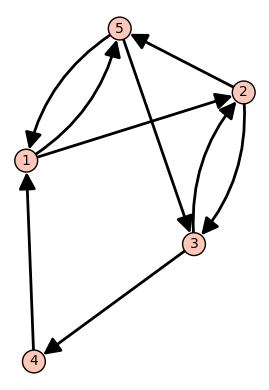

In [8]:
WDA = DiGraph({1: [2,5], 2: [3,5], 3: [2,4], 4: [1], 5: [1, 3]})
WDA.plot()

This is the digraph we're going to use for this example.

In [9]:
def HLMatrix(DG):
    AM = DG.adjacency_matrix().transpose().change_ring(QQ)
    for i in [0..AM.ncols()-1]:
        scale_factor = sum(AM.columns()[i])
        if scale_factor != 0: AM.rescale_col(i, 1/scale_factor)
    return AM

In [10]:
H = HLMatrix(WDA)
show(html('Normalized link matrix: '))
show(H)

Normalized link matrix:

[  0   0   0   1 1/2]
[1/2   0 1/2   0   0]
[  0 1/2   0   0 1/2]
[  0   0 1/2   0   0]
[1/2 1/2   0   0   0]

The objective, is to find the PageRank vector. That vector represents the importance of a website related to the other ones.

In [19]:
def power_method(P, max_error=0.00001):
    v_inic = vector([1 / P.nrows()] * P.nrows()) #Column vector
    iterations = 0
    while True:
        iterations += 1
        new_v = P*v_inic
        if iterations % 5 == 0:
            show(html(f'Iteration: {iterations}, vector: {["{:.4f}".format(float(e) ) for e in new_v]}'))
        for i, elem in enumerate(new_v):
            if elem - v_inic[i] > max_error:
                break
        else:
            return new_v, iterations
        v_inic = new_v

## Main part

In [20]:
v, i = power_method(H)
show(html(f'Perron vector: {v}'))

Iteration: 5, vector: ['0.2313', '0.2125', '0.2250', '0.1062', '0.2250']

Iteration: 10, vector: ['0.2219', '0.2229', '0.2219', '0.1113', '0.2221']

Iteration: 15, vector: ['0.2222', '0.2222', '0.2222', '0.1111', '0.2222']

Perron vector: (116509/524288, 72817/327680, 291273/1310720, 72817/655360, 116509/524288)

v = Perron vector --> Final solution

i = number of iterations needed to find the Perron vector

The algorithm needs 15 iterations to fins the Perron vector. 